**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [320]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [247]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.algorithm = algorithm
        self.k_neighbors = n_neighbors
        self.algorithm = algorithm
        return
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)
        return
    
    def predict(self, X):
        if self.algorithm == 'brute':
            dists = pairwise_distances(X, self.X_train)
            x_mins = np.argpartition(dists, self.k_neighbors, axis=1)[:,:self.k_neighbors]
            y_shaped = np.repeat([self.y_train], np.shape(x_mins)[0], axis=0)
            y_mins = np.take_along_axis(y_shaped, x_mins, axis=1)
            pred = np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, y_mins)
            return pred
        if self.algorithm == 'kd_tree':
            tree = KDTree(self.X_train)
            dist, x_mins = tree.query(X, k=self.k_neighbors)
            y_shaped = np.repeat([self.y_train], np.shape(x_mins)[0], axis=0)
            y_mins = np.take_along_axis(y_shaped, x_mins, axis=1)
            pred = np.apply_along_axis(lambda r: np.bincount(r).argmax(), 1, y_mins)
            return pred
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [248]:
iris = datasets.load_iris()

In [249]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [250]:
clf = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=5, algorithm='brute')
my_clf2 = MyKNeighborsClassifier(n_neighbors=5, algorithm='brute')

In [251]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)
my_clf2.fit(X_train, y_train)

In [252]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
my_clf2_pred = my_clf2.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [253]:
%time clf.fit(X_train, y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [254]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [255]:
%time clf.predict(X_test)

Wall time: 2.99 ms


array([0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0])

In [256]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [257]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [258]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [259]:
%time clf.fit(X_train, y_train)

Wall time: 969 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [260]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [261]:
%time clf.predict(X_test)

Wall time: 25.3 ms


array([1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2])

In [262]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2], dtype=int64)

In [263]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [310]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [311]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [277]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [283]:
clf = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
kf = KFold(n_splits=3)
results = cross_val_score(clf, X, target, cv=kf)

array([0.18080594, 0.18774861, 0.18748343])

In [284]:
results

array([0.18080594, 0.18774861, 0.18748343])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [292]:
x_lab = np.arange(1, 11)
y_lab = []
best_mean_res = 0
kf = KFold(n_splits=3)
for i in x_lab:
    clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    results = cross_val_score(clf, X, target, cv=kf)
    mean_res = np.mean(results)
    y_lab = np.append(y_lab, mean_res)
    if mean_res > best_mean_res:
        best_mean_res = mean_res
        best_k = i
print(best_k)
print(best_mean_res)

1
0.20647001980379184


<BarContainer object of 10 artists>

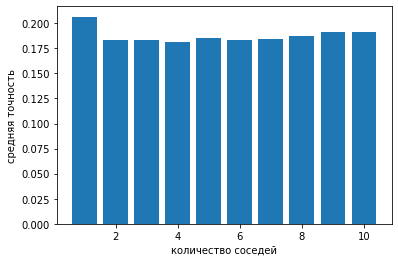

In [301]:
plt.xlabel("количество соседей")
plt.ylabel("средняя точность")
plt.bar(x_lab, y_lab)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

1
0.29238085971534544


<BarContainer object of 10 artists>

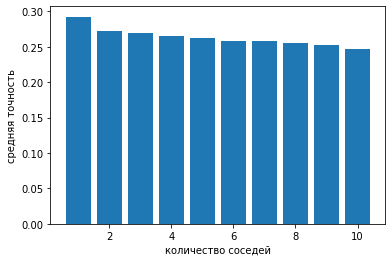

In [302]:
x_lab = np.arange(1, 11)
y_lab = []
best_mean_res = 0
kf = KFold(n_splits=3)
for i in x_lab:
    clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric = 'cosine')
    results = cross_val_score(clf, X, target, cv=kf)
    mean_res = np.mean(results)
    y_lab = np.append(y_lab, mean_res)
    if mean_res > best_mean_res:
        best_mean_res = mean_res
        best_k = i
print(best_k)
print(best_mean_res)
plt.xlabel("количество соседей")
plt.ylabel("средняя точность")
plt.bar(x_lab, y_lab)

In [313]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)

1
0.1487536649950568


<BarContainer object of 10 artists>

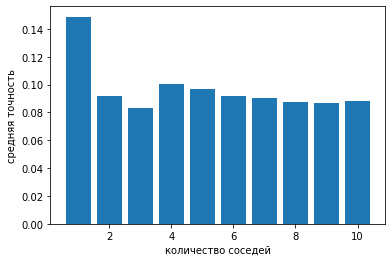

In [306]:
x_lab = np.arange(1, 11)
y_lab = []
best_mean_res = 0
kf = KFold(n_splits=3)
for i in x_lab:
    clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    results = cross_val_score(clf, X, target, cv=kf)
    mean_res = np.mean(results)
    y_lab = np.append(y_lab, mean_res)
    if mean_res > best_mean_res:
        best_mean_res = mean_res
        best_k = i
print(best_k)
print(best_mean_res)
plt.xlabel("количество соседей")
plt.ylabel("средняя точность")
plt.bar(x_lab, y_lab)

1
0.5958995830489591


<BarContainer object of 10 artists>

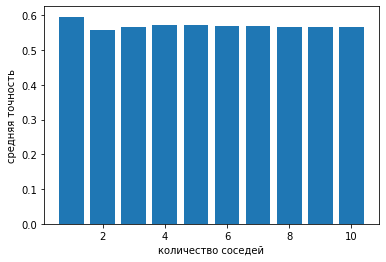

In [314]:
x_lab = np.arange(1, 11)
y_lab = []
best_mean_res = 0
kf = KFold(n_splits=3)
for i in x_lab:
    clf = KNeighborsClassifier(n_neighbors=i, algorithm='brute', metric = 'cosine')
    results = cross_val_score(clf, X, target, cv=kf)
    mean_res = np.mean(results)
    y_lab = np.append(y_lab, mean_res)
    if mean_res > best_mean_res:
        best_mean_res = mean_res
        best_k = i
print(best_k)
print(best_mean_res)
plt.xlabel("количество соседей")
plt.ylabel("средняя точность")
plt.bar(x_lab, y_lab)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [308]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [319]:
data = newsgroups['data']
target = newsgroups['target']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
clf = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric = 'cosine')
kf = KFold(n_splits=3)
results = cross_val_score(clf, X, target, cv=kf)
results

array([0.58801697, 0.59268099, 0.6070008 ])